In [5]:
!pip install mdtraj


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [6]:
import numpy as np


In [17]:
import mdtraj as md
import matplotlib.pyplot as plt

# Load trajectory data
traj = md.load('/home/hz2750/comp-lab-class/comp-lab-class-2023/Week5/Inputs/md.trr', 
               top='/home/hz2750/comp-lab-class/comp-lab-class-2023/Week5/Inputs/md.pdb')

# Define phi and psi dihedral angle indices
phi_indices = [[5, 7, 9, 13]]  # Atom indices for phi
psi_indices = [[7, 9, 13, 16]]  # Atom indices for psi


# Calculate phi and psi dihedral angles
phi_angles = md.compute_dihedrals(traj, phi_indices)
psi_angles = md.compute_dihedrals(traj, psi_indices)

# Convert radians to degrees
phi_degrees = np.degrees(phi_angles) 
psi_degrees = np.degrees(psi_angles)

# Get the time values
time_ps = traj.time


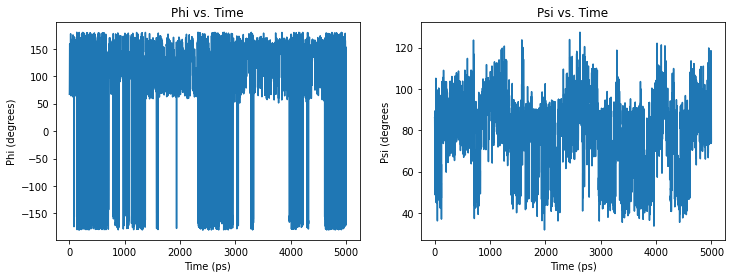

In [14]:
# Create plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time_ps, phi_degrees )
plt.title('Phi vs. Time')
plt.xlabel('Time (ps)')
plt.ylabel('Phi (degrees)')
plt.savefig("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week5/Figures/phivstime.png")

plt.subplot(1, 2, 2)
plt.plot(time_ps, psi_degrees)
plt.title('Psi vs. Time')
plt.xlabel('Time (ps)')
plt.ylabel('Psi (degrees')
plt.savefig("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week5/Figures/psivstime.png")


In [15]:
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

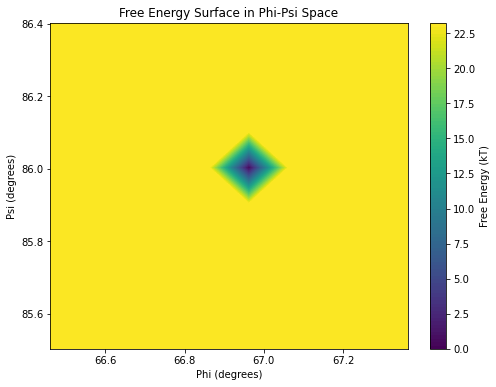

In [30]:

import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory data and compute phi and psi dihedral angles as described in previous responses
# ...

# Convert phi and psi lists to NumPy arrays
#phi_degrees = np.array(phi_degrees)
#psi_degrees = np.array(psi_degrees)

# Define the number of bins for the histogram
bins = (10)

# Compute a 2D histogram of phi and psi
hist, xedges, yedges = np.histogram2d(phi_degrees[0], psi_degrees[0], bins=bins)

# Avoid taking the log of zero
hist[hist == 0] = 1e-10

# Calculate the free energy surface
F = -np.log(hist)

# Find the minimum free energy
min_F = np.min(F)

# Compute F(phi,psi) - min(F(phi,psi))
F_normalized = F - min_F

# Create a 2D contour plot with a colorbar
plt.figure(figsize=(8, 6))
contour = plt.contourf(xedges[:-1], yedges[:-1], F_normalized.T, cmap='viridis', levels=100)
cbar = plt.colorbar(contour)
cbar.set_label('Free Energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.savefig("/home/hz2750/comp-lab-class/comp-lab-class-2023/Week5/Figures/FreeEnergySurfaceinPhi-PsiSpace.png")
plt.show()


